# Problem Set 2 CS129.18

The following problem set will revolve around the Pokemon stats dataset.
The dataset `data/Pokemon.csv` has **721** rows and **27** columns. Not all columns are needed for the questions to be asked.


## 1. How many Legendary Pokemon are there?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pokemon = pd.read_csv('data/pokemon.csv')

In [3]:
pokemon.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [4]:
pokemon.isLegendary.value_counts()

False    675
True      46
Name: isLegendary, dtype: int64

**There are `46` legendary pokemons in the dataset.**
____

## 2. Who is the Pokemon with the highest attack-to-HP ratio? (Tip: Just get the divide attack by HP)

Create a new column which is equal to the ratio of `Attack` and `HP`.

In [5]:
pokemon['A2HP'] = pokemon['Attack']/pokemon['HP']

In [6]:
pokemon[pokemon['A2HP'] == pokemon.A2HP.max()]

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,A2HP
291,292,Shedinja,Bug,Ghost,236,1,90,45,30,30,...,False,NaN,Mineral,NaN,False,0.79,1.2,45,head_base,90.0


**`Shedinja` is the pokemon with the highest attack-to-HP ratio equal to 90.**
____

## 3. Build a binary classifier for whether Pokemon are Fire Type or not.

There are two columns (`Type_1` and `Type_2`) in the dataset that can tell whether a pokemon is fire type or not.

In [7]:
(pokemon.Type_1.unique())

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [8]:
(pokemon.Type_2.unique())

array(['Poison', nan, 'Flying', 'Ground', 'Fairy', 'Grass', 'Fighting',
       'Psychic', 'Steel', 'Ice', 'Rock', 'Water', 'Electric', 'Fire',
       'Dragon', 'Dark', 'Ghost', 'Bug', 'Normal'], dtype=object)

Create new column `isFire` based on whether `Type_1` or `Type_2` is equal to *Fire*.

In [9]:
pokemon['isFire'] = list(map(lambda x,y: 1 if (x == 'Fire' or y == 'Fire') else 0, pokemon.Type_1, pokemon.Type_2))

Count how many of the pokemons are fire type:

In [10]:
pokemon.isFire.value_counts()

0    665
1     56
Name: isFire, dtype: int64

Confirm this from columns `Type_1` and `Type_2`:

In [11]:
sum(pokemon.Type_1 == 'Fire') + sum(pokemon.Type_2 == 'Fire')

56

**This is the resulting dataframe with the fire type classifier column:**

In [12]:
pokemon.sample(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,A2HP,isFire
201,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,...,0.500,Amorphous,NaN,False,1.30,28.5,45,head_base,0.173684,0
101,102,Exeggcute,Grass,Psychic,325,60,40,80,60,45,...,0.500,Grass,NaN,False,0.41,2.5,90,multiple_bodies,0.666667,0
610,611,Fraxure,Dragon,NaN,410,66,117,70,40,50,...,0.500,Monster,Dragon,False,0.99,36.0,60,bipedal_tailed,1.772727,0
644,645,Landorus,Ground,Flying,600,89,125,90,115,80,...,1.000,Undiscovered,NaN,False,1.50,68.0,3,head_arms,1.404494,0
109,110,Weezing,Poison,NaN,490,65,90,120,85,70,...,0.500,Amorphous,NaN,False,1.19,9.5,60,multiple_bodies,1.384615,0
158,159,Croconaw,Water,NaN,405,65,80,80,59,63,...,0.875,Monster,Water_1,False,1.09,25.0,45,bipedal_tailed,1.230769,0
40,41,Zubat,Poison,Flying,245,40,45,35,30,40,...,0.500,Flying,NaN,False,0.79,7.5,255,two_wings,1.125000,0
603,604,Eelektross,Electric,NaN,515,85,115,80,105,80,...,0.500,Amorphous,NaN,False,2.11,80.5,30,with_fins,1.352941,0
20,21,Spearow,Normal,Flying,262,40,60,30,31,31,...,0.500,Flying,NaN,False,0.30,2.0,255,two_wings,1.500000,0
382,383,Groudon,Ground,NaN,670,100,150,140,100,90,...,NaN,Undiscovered,NaN,False,3.51,950.0,3,bipedal_tailed,1.500000,0


____

## 4. Describe the attributes and stats of all Legendary Type pokemon using boxplots.

In [13]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon['isFire'] = list(map(lambda x,y: 1 if (x == 'Fire' or y == 'Fire') else 0, pokemon.Type_1, pokemon.Type_2))

In [14]:
pokemon.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'isFire'],
      dtype='object')

In [15]:
df1 = pokemon[pokemon.isLegendary == True][['Total','HP','Attack','Defense','Sp_Atk', 'Sp_Def', 'Speed', 'Weight_kg', 'Height_m','Catch_Rate','Pr_Male']]

In [16]:
df1.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Weight_kg,Height_m,Catch_Rate,Pr_Male
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,6.00000
mean,620.217391,94.000000,108.608696,101.586957,113.891304,106.543478,95.586957,201.797826,2.449565,6.652174,0.75000
std,44.993290,18.808981,23.536712,26.525104,25.432462,27.236174,20.436977,197.172328,1.723660,11.965167,0.41833
min,580.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,0.300000,0.200000,3.000000,0.00000
25%,580.000000,80.000000,90.000000,90.000000,96.250000,90.000000,90.000000,56.550000,1.500000,3.000000,0.62500
50%,600.000000,91.000000,107.500000,100.000000,117.500000,100.000000,99.000000,196.500000,1.960000,3.000000,1.00000
75%,677.500000,103.750000,123.750000,118.750000,130.000000,120.000000,108.000000,293.750000,3.200000,3.000000,1.00000
max,720.000000,150.000000,160.000000,200.000000,154.000000,200.000000,150.000000,950.000000,7.010000,45.000000,1.00000


<AxesSubplot:>

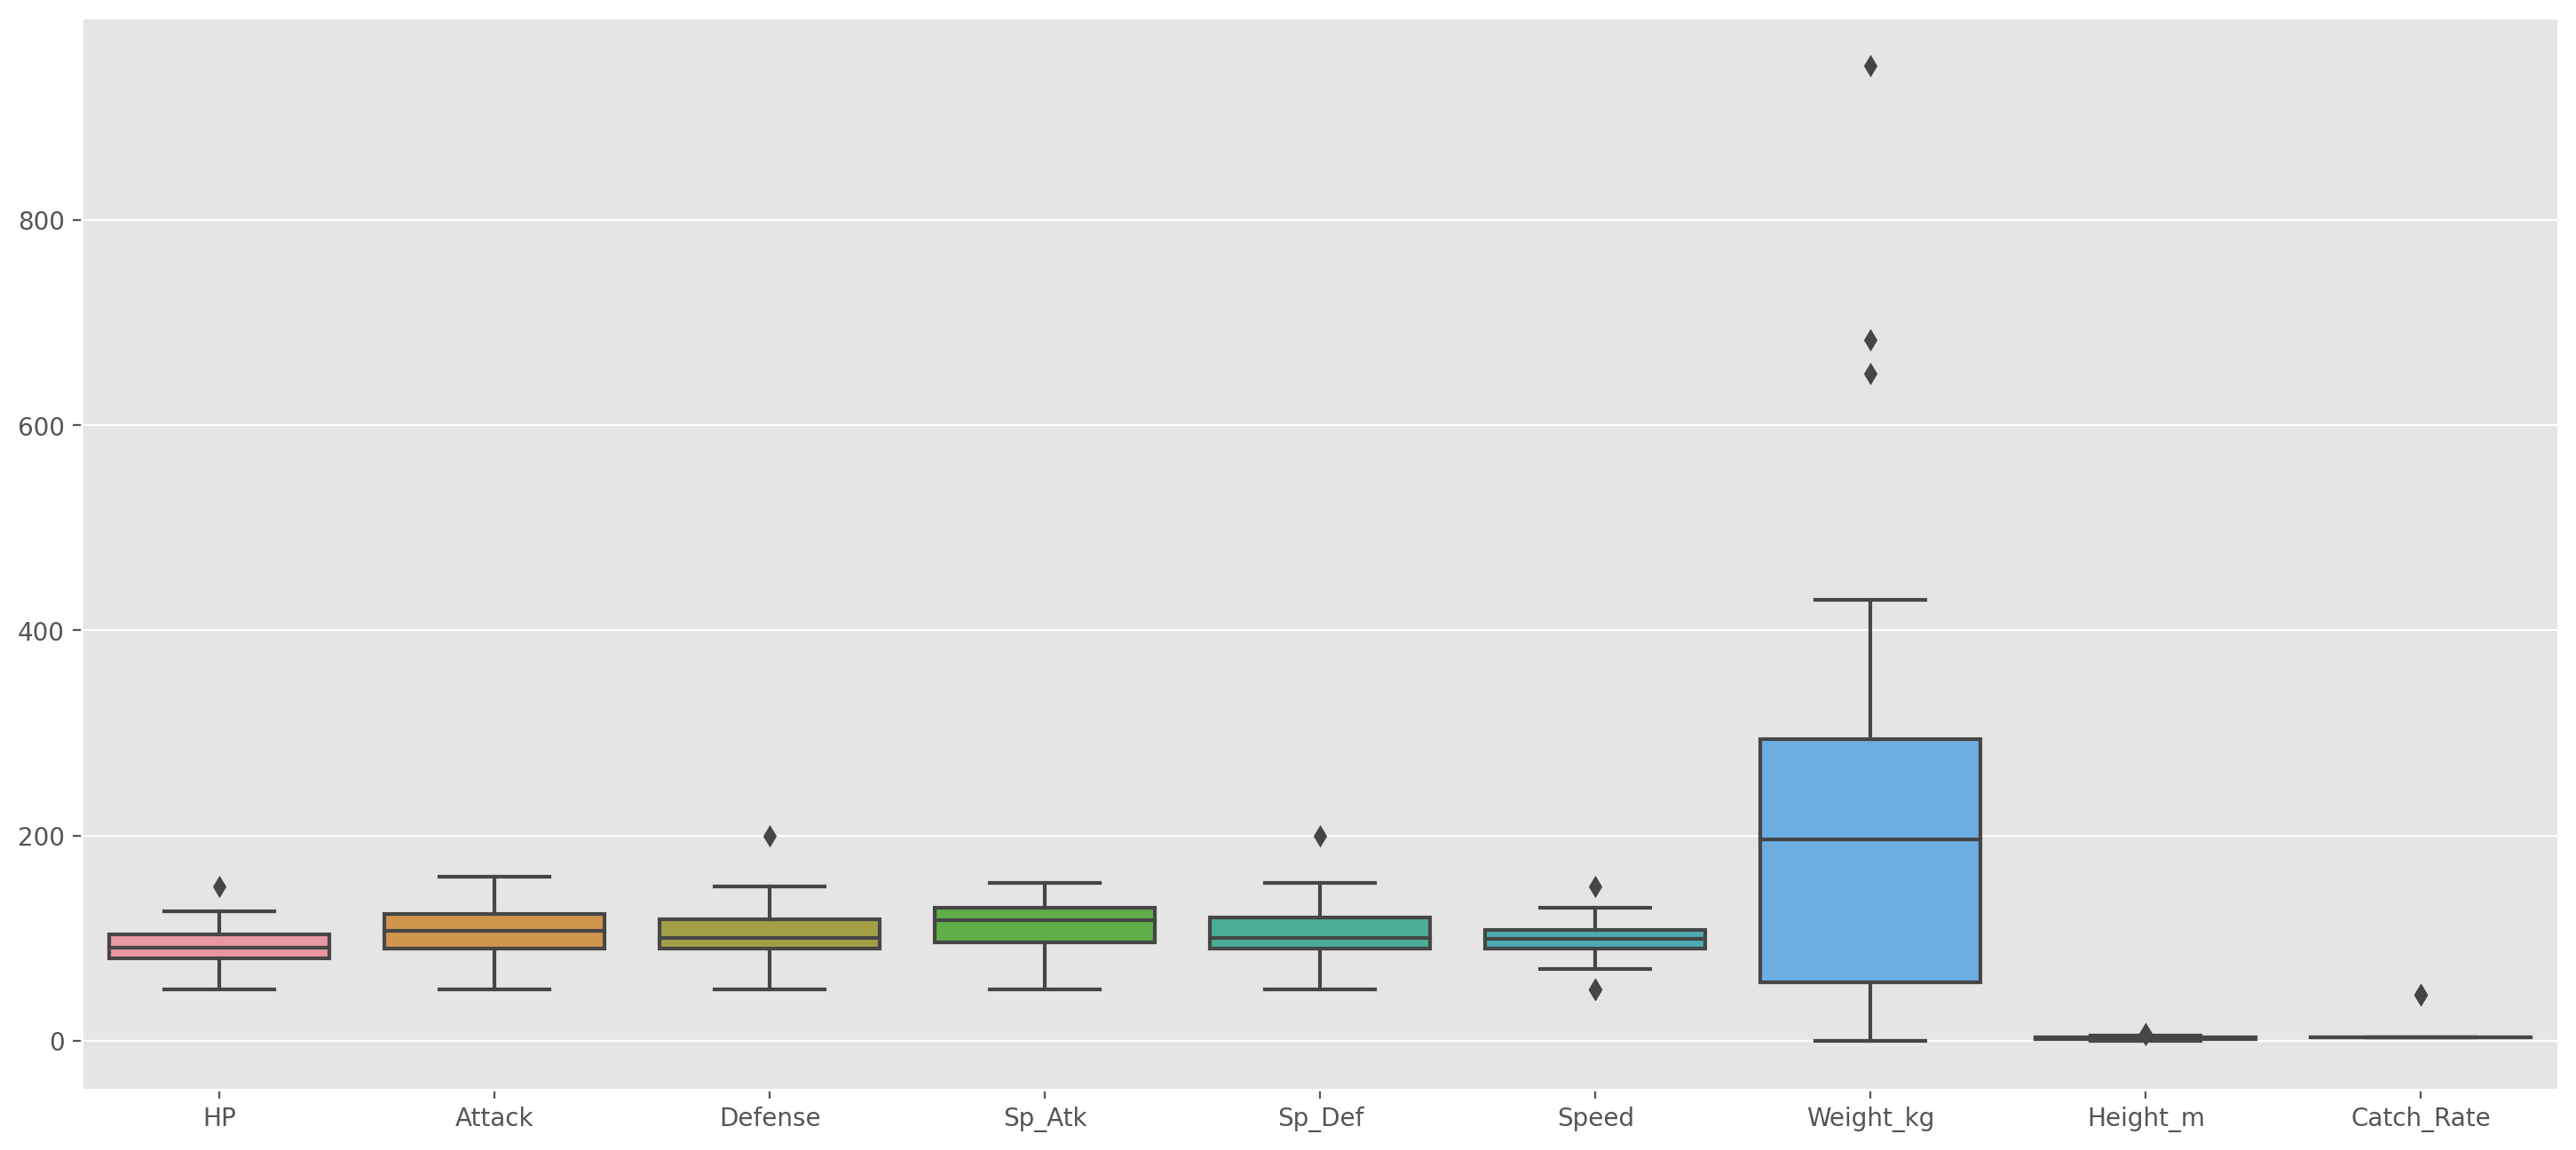

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8),dpi=200)
sns.boxplot(data=pokemon[pokemon.isLegendary == True][['HP','Attack','Defense','Sp_Atk', 'Sp_Def', 'Speed','Weight_kg','Height_m','Catch_Rate']])

## 5. Solve for the probabilities of each Pokemon being a Fire Type.

### Import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [19]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head(3)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped


### Create `isFire` column

In [20]:
pd.set_option('display.max_columns', None)
pokemon['isFire'] = list(map(lambda x,y: 1 if (x == 'Fire' or y == 'Fire') else 0, pokemon.Type_1, pokemon.Type_2))
pokemon.head(3)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,isFire
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped,0


### Drop some columns

The `Number` and `Name` columns will not be very useful for the predictive model. The `isFire` columns was derived from `Type_1` and `Type_2` so it best to remove these columns to avoid multicollinearity problems. The same situation applies to `Total` column. `hasGender` will not be needed also because its information will be obvious in the `Pr_Male` column once the `Pr_Male` column's missing values are imputed with *NoGender*.

In [21]:
pokemon.drop(['Number','Name','Type_1','Type_2','Total','hasGender','Generation'],axis=1, inplace=True)
pokemon.head(3)

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,Color,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,isFire
0,45,49,49,65,65,45,False,Green,0.875,Monster,Grass,False,0.71,6.9,45,quadruped,0
1,60,62,63,80,80,60,False,Green,0.875,Monster,Grass,False,0.99,13.0,45,quadruped,0
2,80,82,83,100,100,80,False,Green,0.875,Monster,Grass,True,2.01,100.0,45,quadruped,0


### Impute missing values

Columns containing missing values:

In [22]:
pokemon.isnull().sum().sort_values(ascending=False).head()

Egg_Group_2    530
Pr_Male         77
Egg_Group_1      0
Body_Style       0
Catch_Rate       0
dtype: int64

#### Impute the missing values in `Pr_Male` columns with *NoGender*. 
Imputing the column will also convert its dtype from float to object type.

In [23]:
pokemon.Pr_Male.fillna('NoGender',inplace=True)

These are now the new values of `Pr_Male`.

In [24]:
pokemon.Pr_Male.value_counts()

0.5         458
0.875       101
NoGender     77
0.0          23
0.25         22
1.0          19
0.75         19
0.125         2
Name: Pr_Male, dtype: int64

#### Impute missing values in `Egg_Group_2`

In [25]:
pokemon.Egg_Group_2.fillna('None', inplace=True)
pokemon.Egg_Group_2.value_counts().head(5)

None      530
Dragon     35
Grass      32
Field      31
Fairy      17
Name: Egg_Group_2, dtype: int64

### Dummy-code some columns

Define a function that will dummy-code multiple columns.

In [26]:
def dummify(data, columns):
    for col in columns:
        x = pd.get_dummies(data[col],prefix=col,drop_first=False)
        data = data.drop(col, 1)
        data = pd.concat([data, x], axis=1)
    return data

In [27]:
dummified = dummify(data=pokemon,columns=['Color','Pr_Male','Egg_Group_1','Egg_Group_2','Body_Style'])

In [28]:
dummified.head()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,isLegendary,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,isFire,Color_Black,Color_Blue,Color_Brown,Color_Green,Color_Grey,Color_Pink,Color_Purple,Color_Red,Color_White,Color_Yellow,Pr_Male_0.0,Pr_Male_0.125,Pr_Male_0.25,Pr_Male_0.5,Pr_Male_0.75,Pr_Male_0.875,Pr_Male_1.0,Pr_Male_NoGender,Egg_Group_1_Amorphous,Egg_Group_1_Bug,Egg_Group_1_Ditto,Egg_Group_1_Dragon,Egg_Group_1_Fairy,Egg_Group_1_Field,Egg_Group_1_Flying,Egg_Group_1_Grass,Egg_Group_1_Human-Like,Egg_Group_1_Mineral,Egg_Group_1_Monster,Egg_Group_1_Undiscovered,Egg_Group_1_Water_1,Egg_Group_1_Water_2,Egg_Group_1_Water_3,Egg_Group_2_Amorphous,Egg_Group_2_Bug,Egg_Group_2_Dragon,Egg_Group_2_Fairy,Egg_Group_2_Field,Egg_Group_2_Flying,Egg_Group_2_Grass,Egg_Group_2_Human-Like,Egg_Group_2_Mineral,Egg_Group_2_Monster,Egg_Group_2_None,Egg_Group_2_Water_1,Egg_Group_2_Water_2,Egg_Group_2_Water_3,Body_Style_bipedal_tailed,Body_Style_bipedal_tailless,Body_Style_four_wings,Body_Style_head_arms,Body_Style_head_base,Body_Style_head_legs,Body_Style_head_only,Body_Style_insectoid,Body_Style_multiple_bodies,Body_Style_quadruped,Body_Style_serpentine_body,Body_Style_several_limbs,Body_Style_two_wings,Body_Style_with_fins
0,45,49,49,65,65,45,False,False,0.71,6.9,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,60,62,63,80,80,60,False,False,0.99,13.0,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,80,82,83,100,100,80,False,True,2.01,100.0,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,39,52,43,60,50,65,False,False,0.61,8.5,45,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,58,64,58,80,65,80,False,False,1.09,19.0,45,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Train/Test  Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = dummified.drop('isFire',axis=1)
y = dummified['isFire']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Scale

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()
X_train[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Weight_kg','Height_m','Catch_Rate']] = sc.fit_transform(X_train[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Weight_kg','Height_m','Catch_Rate']])
X_test[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Weight_kg','Height_m','Catch_Rate']] = sc.fit_transform(X_test[['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','Weight_kg','Height_m','Catch_Rate']])

### Upsampling

In [34]:
y_train.value_counts()

0    466
1     38
Name: isFire, dtype: int64

In [35]:
from sklearn.utils import resample

In [36]:
X = pd.concat([X_train, y_train], axis=1)

In [37]:
notFire = X[X.isFire==0]

In [38]:
yesFire = X[X.isFire==1]

In [39]:
notFire.shape

(466, 73)

In [40]:
yesFire_upsampled = resample(yesFire,
                          replace=True, 
                          n_samples=len(notFire), 
                          random_state=25)

In [41]:
yesFire_upsampled = pd.concat([notFire, yesFire_upsampled])

In [42]:
yesFire_upsampled.isFire.value_counts()

0    466
1    466
Name: isFire, dtype: int64

In [43]:
X_train_upsampled = yesFire_upsampled.drop('isFire',axis=1)
y_train_upsampled = yesFire_upsampled['isFire']

### Train

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
pred = lr.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
prob = pd.DataFrame(lr.predict_proba(X_test))

### Column `1` of the dataframe below shows the probability of a pokemon being a fire type.

In [69]:
pd.concat([prob,pd.DataFrame(pred,columns=['isFire'])],axis=1).sample(20)

,0,1,isFire
176,0.998603,0.001397,0
109,0.975148,0.024852,0
190,0.940932,0.059068,0
52,0.998325,0.001675,0
151,0.986246,0.013754,0
126,0.997894,0.002106,0
188,0.968512,0.031488,0
14,0.952868,0.047132,0
8,0.995623,0.004377,0
143,0.997111,0.002889,0


## 6. What is the accuracy of your model? (2pts)

In [50]:
from sklearn import metrics

In [66]:
print('#'*45)
print('Model performance metrics without upsampling:')
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))
print("F1 Score:",metrics.f1_score(y_test, pred))
print('#'*45)

#############################################
Model performance metrics without upsampling:
Accuracy: 0.9308755760368663
Precision: 0.6363636363636364
Recall: 0.3888888888888889
F1 Score: 0.4827586206896552
#############################################


## 7. Apply upsampling for the minority class that is Fire Type and show the change in Accuracy and Precision. (3pts)

In [52]:
lr_upsampled = LogisticRegression()

In [53]:
lr_upsampled.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression()

In [54]:
pred_upsampled = lr_upsampled.predict(X_test)

In [67]:
print('#'*42)
print('Model performance metrics with upsampling:')
print("Accuracy:",metrics.accuracy_score(y_test, pred_upsampled))
print("Precision:",metrics.precision_score(y_test, pred_upsampled))
print("Recall:",metrics.recall_score(y_test, pred_upsampled))
print("F1 Score:",metrics.f1_score(y_test, pred_upsampled))
print('#'*42)

##########################################
Model performance metrics with upsampling:
Accuracy: 0.8940092165898618
Precision: 0.41935483870967744
Recall: 0.7222222222222222
F1 Score: 0.5306122448979592
##########################################


## Bonus 1 : What is the difference between machine learning and pattern recognition?

> **Machine Learning** deals with the construction and study of systems that can learn from data, rather than follow only explicitly programmed instructions whereas **Pattern Recognition** is the recognition of patterns and regularities in data.

## Bonus 2: Who is your favorite Pokemon?

> **Pikachu**